In [1]:
import numpy as np
import matplotlib.pyplot as plt


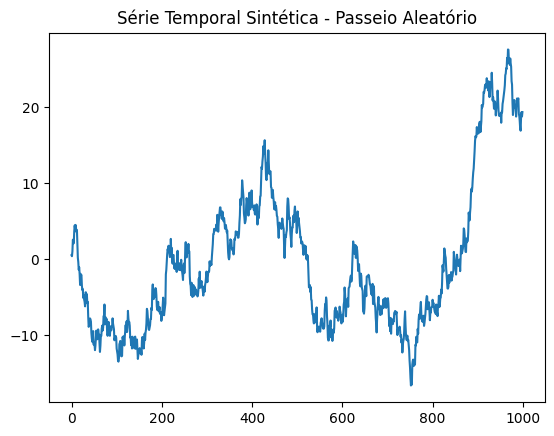

In [2]:
# Gerar uma série temporal sintética de um passeio aleatório
np.random.seed(42)
N = 1000
random_walk = np.cumsum(np.random.randn(N))

plt.plot(random_walk)
plt.title("Série Temporal Sintética - Passeio Aleatório")
plt.show()


In [3]:
def calculate_mfdfa(series, scales, q_values):
    """
    Calcula a função de flutuação para uma série temporal e múltiplas escalas.

    Parameters:
    - series: np.ndarray, série temporal
    - scales: np.array, janela de escalas
    - q_values: np.array, valores q para análise multifractal

    Returns:
    - mfdfa: np.ndarray, matriz das funções de flutuação
    """
    # Dimensões: n_janelas vs q-values
    mfdfa = np.zeros((len(scales), len(q_values)))
    
    for idx, scale in enumerate(scales):
        for start in range(0, len(series) - scale, scale):
            window = series[start:start + scale]
            trend = np.polyfit(np.arange(scale), window, 1)
            detrended = window - np.polyval(trend, np.arange(scale))
            fluctuation = np.sum(detrended ** 2) / scale
            mfdfa[idx, :] += fluctuation ** (q_values / 2)
    
    mfdfa = (mfdfa / ((len(series) - scale) // scale)) ** (1 / q_values)
    return mfdfa

# Configurar as escalas e os valores de q
scales = np.logspace(2, 5, num=10, base=2).astype(int)
q_values = np.linspace(-5, 5, 11)

# Calcular MFDFA
mfdfa = calculate_mfdfa(random_walk, scales, q_values)


C:\Users\limam\AppData\Local\Temp\ipykernel_11320\1286375733.py:24: RuntimeWarning: divide by zero encountered in divide
  mfdfa = (mfdfa / ((len(series) - scale) // scale)) ** (1 / q_values)


In [5]:
print(f"mfdfa shape: {mfdfa.shape}, q length: {len(q_values)}")


mfdfa shape: (10, 11), q length: 11


In [6]:
from MFDFA.singspect import singularity_spectrum, scaling_exponents, hurst_exponents, singularity_spectrum_plot, scaling_exponents_plot, hurst_exponents_plot
alpha, f = singularity_spectrum(scales, mfdfa, q_values)

# Plotar o espectro de singularidade
fig, ax = singularity_spectrum_plot(alpha, f)
plt.title("Singularity Spectrum f(α)")
plt.show()


ValueError: Fluctuation function and q powers don't match in dimension.

In [ ]:
q, tau = scaling_exponents(scales, mfdfa, q_values)

# Plotar os expoentes de escala
fig, ax = scaling_exponents_plot(q, tau)
plt.title("Scaling Exponents τ(q)")
plt.show()


In [ ]:
q, hq = hurst_exponents(scales, mfdfa, q_values)

# Plotar os expoentes de Hurst
fig, ax = hurst_exponents_plot(q, hq)
plt.title("Generalized Hurst Exponents h(q)")
plt.show()


In [18]:
import numpy as np
from MFDFA import MFDFA

from MFDFA.singspect import (
    singularity_spectrum,
    scaling_exponents,
    hurst_exponents,
    singularity_spectrum_plot,
    scaling_exponents_plot,
    hurst_exponents_plot
)

# Função de exemplo para gerar uma série temporal
def generate_example_series(n_points=1000):
    # Exemplo de série temporal: ruído branco gaussiano
    return np.cumsum(np.random.randn(n_points))

# Gerando uma série temporal de exemplo
series = generate_example_series()

# Definir valores de q (valores fractais)
q_values = np.linspace(-5, 5, 11)  # 11 valores de q

# Definir escalas (lags)
scales = np.logspace(2, 4, num=20, base=2).astype(int)

# Realizar MFDFA
mfdfa_result = MFDFA(series,  q=q_values)

# Verificando dimensões para garantir compatibilidade
print(f"mfdfa shape: {mfdfa_result.shape}, q length: {len(q_values)}")

# O número de colunas de 'mfdfa_result' precisa ser igual ao tamanho de 'q_values'
if mfdfa_result.shape[1] != len(q_values):
    raise ValueError("O número de colunas de mfdfa_result deve ser igual ao tamanho de q_values.")

# Cálculo do espectro de singularidade
alpha, f = singularity_spectrum(scales, mfdfa_result, q_values)

# Plotar o espectro de singularidade
fig, ax = singularity_spectrum_plot(alpha, f)
fig.show()

# Calcular e plotar os expoentes de escala
q, tau = scaling_exponents(scales, mfdfa_result, q_values)
fig, ax = scaling_exponents_plot(q, tau)
fig.show()

# Calcular e plotar os expoentes de Hurst
q, hq = hurst


TypeError: MFDFA() missing 1 required positional argument: 'lag'